In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns

sns.set()

#### 50. 母比率の区間推定

(0.35199088323644695, 0.4480091167635531)

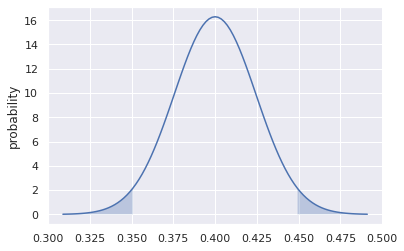

In [3]:
n = 400 #標本数
p = 0.4 #標本比率

mu = p #標本比率の平均
sigma = np.sqrt(stats.bernoulli.var(p=p)/n) #標本比率の標準偏差

alpha = 0.95 #信頼度
ci = stats.norm.interval(confidence=alpha, loc=mu, scale=sigma) #信頼区間

x = np.linspace(
    start=stats.norm.ppf(q=0.0001, loc=mu, scale=sigma), 
    stop=stats.norm.ppf(q=0.9999, loc=mu, scale=sigma), 
    num=101)
df = pd.DataFrame(index=x)

y = stats.norm.pdf(x=x, loc=mu, scale=sigma)
df = pd.concat([df, pd.DataFrame({"probability": y}, index=x)], axis=1)

ax = sns.lineplot(x=df.index, y=df.probability, data=df)
ax.fill_between(
    x=df.index, y1=df.probability, 
    where=(df.index<=ci[0])|(df.index>=ci[1]), 
    alpha=0.3)

ci

#### 52. カイ二乗分布

<AxesSubplot:>

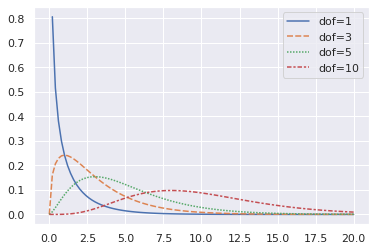

In [4]:
x = np.linspace(start=0, stop=20, num=101)
df = pd.DataFrame(index=x)

for dof in [1, 3, 5, 10]: #自由度
    y = stats.chi2.pdf(x=x, df=dof, loc=0, scale=1) #カイ二乗分布
    df = pd.concat([df, pd.DataFrame({f"dof={dof}": y}, index=x)], axis=1)

sns.lineplot(data=df)

#### 54. 母分散の区間推定

(0.13756704134979997, 0.3651220365039148)

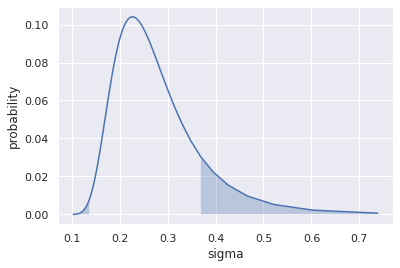

In [5]:
n = 10 #標本数
mu = 0 #標本平均 
sigma = 0.2 #不偏分散

alpha = 0.95 #信頼度
ci = tuple([
    np.sqrt((n-1)*(sigma**2)/x)
        for x in reversed(stats.chi2.interval(confidence=alpha, df=n-1))
]) #信頼区間

x = np.linspace(
    start=stats.chi2.ppf(q=0.0001, df=n-1), 
    stop=stats.chi2.ppf(q=0.9999, df=n-1), 
    num=101)
df = pd.DataFrame(index=x)

y = stats.chi2.pdf(x=x, df=n-1, loc=0, scale=1)
df = pd.concat([df, pd.DataFrame({"probability": y}, index=x)], axis=1)

z = np.sqrt((n-1)*(sigma**2)/x)
df = pd.concat([df, pd.DataFrame({"sigma": z}, index=x)], axis=1)

ax = sns.lineplot(x=df.sigma, y=df.probability, data=df)
ax.fill_between(x=df.sigma, y1=df.probability, 
    where=(df.sigma<=ci[0])|(df.sigma>=ci[1]), alpha=0.3)

ci